# Game Sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

## 1 分析の目的

世界のゲームの販売データから地域別の販売傾向を分析します。

![](images/video-game-sales-screenshot.png)

データは Kaggle Dataset [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales) から入手したものを本講座用に加工したものを使います。

## 2 データ

集計対象は、1980年から2016年10月までの世界のゲームの販売データです。データは以下の二つのファイルに分割されています。

- `game_sales.csv`: ゲームタイトルの販売数を地域別に記録したデータ
- `game_info.csv`: ゲームタイトルの情報を記録したデータ

## 3 データの読み込みと確認

### データの読み込み 

`data/game_sales.csv` を `DataFrame` として読み込んで `game_sales` と名付けて下さい。`game_sales.csv` に記録されているデータは16598行、6列で、各行は

- `ID`: ゲームタイトルのID
- `NA_Sales`: 北米での販売数
- `EU_Sales`: 欧州での販売数
- `JP_Sales`: 日本での販売数
- `Other_Sales`: その他地域での販売数
- `Global_Sales`: 全世界での販売数

となっています。販売数の単位は100万本です。

In [ ]:
# data/game_sales.csv を DataFrame として読み込んで game_sales と名付けて下さい。

### データの確認

データの行数と列数が正しいかどうかを確認します。

In [ ]:
# game_sales の行数と列数が正しいことを確認してください。

各列のデータ型を確認します。データ型を変換する必要があるのかどうかを確認します。

In [ ]:
# 各列のデータ型を確認してください。

データの要約統計量を確認します。確認するべき点は

- データの欠損
- 外れ値
- 矛盾のある数値

In [ ]:
# データの要約統計量を確認してください。

In [ ]:
# 外れ値や欠損のあるレコードを確認してください。

### 外れ値や欠損データの処理

外れ値や欠損のある場合はそれらを含むレコードを処理してください。

### 演習問題

`data/game_info.csv` を `DataFrame` として読み込んで `game_info` という変数にしてください。`game_info.csv` に記録されているデータは16598行、6列で、各行は

- `ID`: ゲームタイトルのID
- `Rank`: 販売数での順位
- `Name`: 名前
- `Year`: 発売年
- `Platform`: プラットフォーム (PS4、Wii等)
- `Genre`: ジャンル
- `Publisher`: 販売会社

となっています。

#### データの読み込み

In [ ]:
# data/game_sales.csv を DataFrame として読み込んで game_info と名付けて下さい。

#### データの確認

In [ ]:
# game_info の行数と列数を確認してください。

In [ ]:
# 各列のデータ型を確認してください。

In [ ]:
# データの要約統計量を確認してください。

In [ ]:
# 外れ値や欠損のある場合はレコードを確認してください。

#### 外れ値や欠損データの処理

In [ ]:
# 外れ値や欠損のある場合はそれらを含むレコードを処理してください。

## 4 データ加工と基礎集計

### データのマージ

集計に必要な情報が二つのテーブル（`game_sales` と `game_info`）に分離しているため一つにまとめます。この作業をマージと呼びます。確認すべき点は

- マージ前後での件数の変化と
- マージ後の欠損データの有無

です。

In [24]:
# game_sales と game_info をマージして game_data と名付けてください。
game_data = pd.concat([game_sales, game_info], axis=1, join='inner')

今回は2001年から2015年までの期間を対象にするので、この期間外のデータを削除します。

In [25]:
game_data.query('Year > 2000 & Year < 2016', inplace=True)
game_data.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales   Rank  \
ID                                                                      
18690      0.09      0.18      0.01         0.10          0.37   5113   
16381      0.11      0.15      0.00         0.06          0.32   5603   
7473       0.00      0.00      0.02         0.00          0.02  15860   
12972      0.41      0.11      0.00         0.04          0.55   3632   
4354       0.01      0.00      0.00         0.00          0.01  16587   

                                          Name Platform  Year       Genre  \
ID                                                                          
18690    Prince of Persia: The Forgotten Sands      PSP  2010      Action   
16381                              Overlord II      PS3  2009      Action   
7473         Kadenz fermata//Akkord:fortissimo      PSV  2014   Adventure   
12972  ZhuZhu Pets 2: Featuring The Wild Bunch       DS  2010  Simulation   
4354                          Bust-A-Move 3000       GC  2003      Puzzle   

         Publisher  
ID                  
18690      Ubisoft  
16381  Codemasters  
7473           5pb  
12972   Activision  
4354       Ubisoft

In [ ]:
# game_data の行数と列数を確認してください。

In [ ]:
# game_data の各列のデータ型を確認してください。

In [ ]:
# game_data の要約統計量を確認してください。

### 各列の分布の確認

分布の集計と可視化の方法は、データ型によって異なります。

| データ型 |       集計      |       可視化      |
|:--------:|:---------------:|:-----------------:|
|   数値   |  四分位数、分散  |    ヒストグラム   |
| カテゴリ | ユニーク数、分布 | 棒グラフ、円グラフ |

数値データの分布を確認します。全世界での売上本数の四分位数と分散を確認します。

In [ ]:
# 全世界での売上数の要約統計量を確認してください。

全世界での売上本数の分布をヒストグラムから確認します。

In [ ]:
# 全世界での売上数のヒストグラムをプロットしてください。

カテゴリデータの分布を確認します。各年に発売されたゲームの分布数を確認します。

In [1]:
# 各年に発売されたゲームタイトル数の分布を確認してください。

各年に発売されたゲームの分布を棒グラフで確認します。

In [2]:
# 各年に発売されたゲームタイトル数を棒グラフとしてプロットしてください。

### 練習問題

In [ ]:
# ジャンルごとのゲームタイトルの数を棒グラフにして可視化して下さい。

In [ ]:
# ゲームタイトル数がトップ15の販売会社のゲームタイトル数を棒グラフでプロットしてください。

## 5 可視化

- 今回の分析の目的は、地域別の売上傾向を分析すること
- 全体の傾向と地域別の傾向を比較して知見を得る

### 集計対象の整理

アウトプットをイメージして集計対象を整理します。

|        集計項目        |            利用する要素            |    可視化    |
|:----------------------:|:----------------------------------:|:------------:|
|    地域別の販売割合    |           各地域の販売数           |   円グラフ   |
|      年別の販売数      |        各地域の年別の販売数        | 線、面グラフ |
|   ジャンル別の販売数   |     各地域のジャンル別の販売数     |   棒グラフ   |
| プラットフォーム別の販売数 | 各地域のプラットフォーム別の販売数 |   棒グラフ   |

### クロス集計と可視化

これから先の集計で地域別販売数の列名のリスト `['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']` が何度も必要になります。このリストを `SALES` と名付けます。

In [ ]:
SALES = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

#### 地域別の販売シェア

各地域の販売シェアを集計して可視化します。

In [ ]:
# 地域別販売数を集計してください。
# 結果を昇順に並べ替えて sales_by_region と名付けてください。

In [ ]:
# sales_by_region を円グラフにプロットしてください。

グラフから読み取れることはなんですか？

#### 地域別の販売数およびシェアの推移

地域別販売数の推移を集計して可視化します。

In [ ]:
# 発売年ごとの地域別販売数を集計してください。結果を sales_by_year と名付けてください。

In [ ]:
# sales_by_year をX軸に発売年、Y軸に販売数を地域別の線グラフとしてプロットしてください。

地域別の販売数のシェアの推移を集計して可視化します。

In [ ]:
# sales_by_year の各年の地域ごとの販売数をそれらの総和で割ってください。
# 結果を share_by_year と名付けてください。

In [ ]:
# share_by_year を面グラフとしてプロットして下さい。
#
# Hint: 面グラフは、DataFrame.plot.area() でプロットすることができます。

グラフから読み取れることはなんですか？

#### 各地域でのジャンル別の販売数および販売シェア

ジャンル別の販売数を地域別に集計して可視化します。

In [ ]:
# ジャンルごとに地域別販売数を集計してください。結果を sales_by_genre と名付けてください。

In [ ]:
# sales_by_genre を、X軸に地域、Y軸にジャンル別の販売数を
# 積み上げ棒グラフとしてプロットしてください。

ジャンル別の販売数のシェアを地域別に集計して可視化します。

In [ ]:
# sales_by_genre の各ジャンルの販売数をそれらの総和で割ってください。
# 結果を share_by_genre と名付けてください。

In [ ]:
# share_by_genre をX軸に地域、Y軸にジャンル別の販売シャアの
# 積み上げ棒グラフとしてプロットしてください。

グラフから読み取れることはなんですか？

#### 各地域でのプラットフォーム別の販売数および販売シェア

プラットフォーム別の販売数を地域別に集計して可視化します。

In [50]:
# プラットフォームごとに地域別販売数を集計してください。
# 結果を sales_by_platform と名付けてください。
sales_by_platform = game_data.groupby('Platform')[SALES].sum()
sales_by_platform.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
3DS          77.20     57.72     92.20        12.43
DC            0.00      0.00      1.42         0.00
DS          388.26    193.90    175.00        60.26
GB            2.73      1.67      4.65         0.19
GBA         178.34     72.46     46.56         7.51

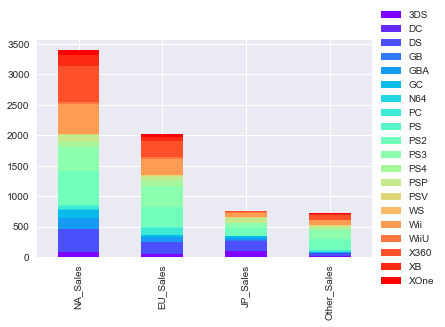

In [51]:
# sales_by_platform を、X軸に地域、Y軸にプラットフォーム別の販売数を
# 積み上げ棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(sales_by_platform
 .transpose()
 .plot.bar(stacked=True, cmap='rainbow', ax=ax))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

プラットフォーム別の販売数のシェアを地域別に集計して可視化します。

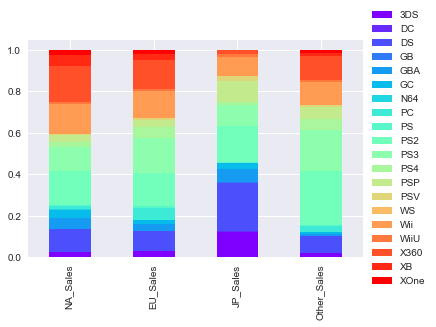

In [52]:
# sales_by_platform のプラットフォーム別の販売数をそれらの総和で割ってください。
# 結果を積み上げ棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(sales_by_platform
 .apply(lambda x : x / sales_by_platform.sum(axis=0), axis=1)
 .transpose()
 .plot.bar(stacked=True, cmap='rainbow', ax=ax))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

#### 各地域での販売数トップ15のゲームタイトル

全世界での販売数がトップ15のゲームタイトルの地域別販売数を抽出して可視化します。

In [ ]:
# game_data から全世界での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_global と名付けてください。

In [ ]:
# top15_global をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。

In [ ]:
# top15_global をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。

グラフから読み取れることはなんですか？

北米での販売数が上位15のゲームタイトルの地域別販売数を抽出して可視化します。

In [56]:
# game_data から北米での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_na と名付けてください。
top15_na = (game_data
         .sort_values('NA_Sales', ascending=False)
         .head(15)[['Name'] + SALES]
         .set_index('Name'))
top15_na.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Name                                                                
Wii Sports                    41.49     29.02      3.77         8.46
Mario Kart Wii                15.85     12.88      3.79         3.31
Wii Sports Resort             15.75     11.01      3.28         2.96
Kinect Adventures!            14.97      4.94      0.24         1.67
New Super Mario Bros. Wii     14.59      7.06      4.70         2.26

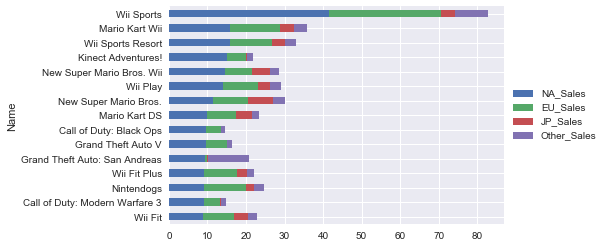

In [57]:
# top15_na をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_na.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

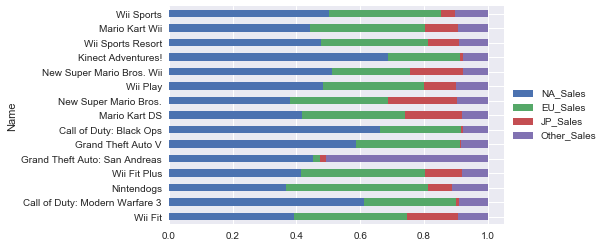

In [58]:
# top15_na をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_na
 .apply(lambda x : x / top15_na.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

欧州での販売数がトップ15のゲームタイトルの地域別販売数を抽出して可視化します。

In [59]:
# game_data から欧州での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_eu と名付けてください。
top15_eu = (game_data
         .sort_values('EU_Sales', ascending=False)
         .head(15)[['Name'] + SALES]
         .set_index('Name'))
top15_eu.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Name                                                         
Wii Sports             41.49     29.02      3.77         8.46
Mario Kart Wii         15.85     12.88      3.79         3.31
Wii Sports Resort      15.75     11.01      3.28         2.96
Nintendogs              9.07     11.00      1.93         2.75
Grand Theft Auto V      7.01      9.27      0.97         4.14

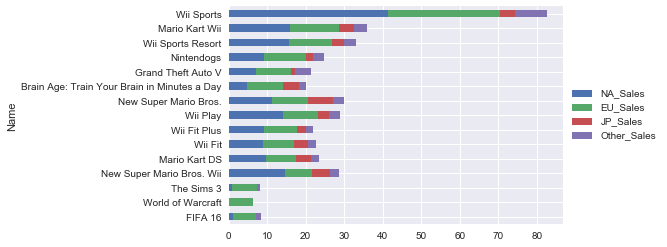

In [60]:
# top15_eu をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_eu.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

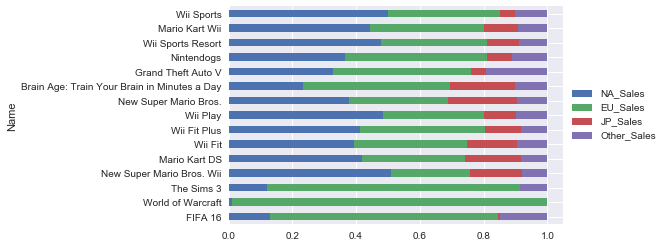

In [61]:
# top15_eu をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_eu
 .apply(lambda x : x / top15_eu.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

日本での販売数が上位15のゲームタイトルの地域別販売数を抽出して可視化します。

In [62]:
# game_data から日本での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_jp と名付けてください。
top15_jp = (game_data
         .sort_values('JP_Sales', ascending=False)
         .head(15)[['Name'] + ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
         .set_index('Name'))
top15_jp.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Name                                                                    
New Super Mario Bros.             11.38      9.23      6.50         2.90
Pokemon Diamond/Pokemon Pearl      6.42      4.52      6.04         1.37
Pokemon Black/Pokemon White        5.57      3.28      5.65         0.82
Pokemon Ruby/Pokemon Sapphire      6.06      3.90      5.38         0.50
Animal Crossing: Wild World        2.55      3.52      5.33         0.88

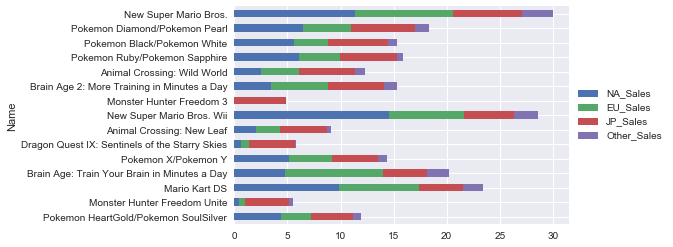

In [63]:
# top15_jp をX軸がゲームタイトル、Y軸が地域別販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_jp.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

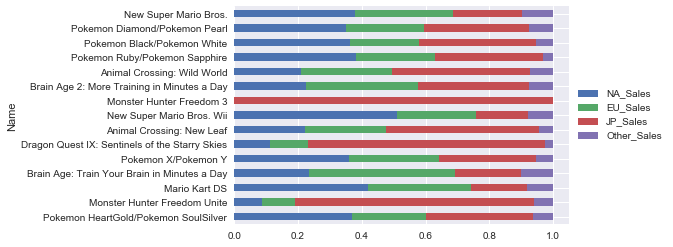

In [64]:
# top15_jp をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_jp
 .apply(lambda x : x / top15_jp.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

その他地域での販売数が上位15のゲームタイトルの地域別販売数を抽出して可視化します。

In [65]:
# game_data からその他地域での販売数が上位15のゲームタイトルの
# 地域別販売数を抽出してください。結果を top15_other と名付けてください。
top15_other = (game_data
         .sort_values('Other_Sales', ascending=False)
         .head(15)[['Name'] + SALES]
         .set_index('Name'))
top15_eu.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Name                                                         
Wii Sports             41.49     29.02      3.77         8.46
Mario Kart Wii         15.85     12.88      3.79         3.31
Wii Sports Resort      15.75     11.01      3.28         2.96
Nintendogs              9.07     11.00      1.93         2.75
Grand Theft Auto V      7.01      9.27      0.97         4.14

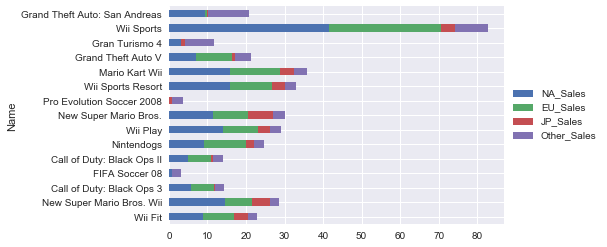

In [66]:
# top15_other をX軸がゲームタイトル、Y軸が地域別の販売数の
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
top15_other.plot.barh(stacked=True, ax=ax)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

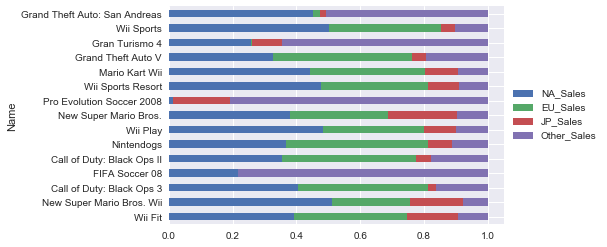

In [67]:
# top15_other をX軸がゲームタイトル、Y軸が地域別販売シェアの
# 積み上げ横棒グラフとしてプロットしてください。
fig, ax = plt.subplots()
(top15_other
 .apply(lambda x : x / top15_other.sum(axis=1))
 .plot.barh(stacked=True, ax=ax))
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

グラフから読み取れることはなんですか？

#### ジャンルごとの販売数の地域間の相関

ジャンルごとの各地域間の相関係数をヒートマップで確認してみます。

In [68]:
def corr_between_regions(df):
    corr = df.corr()
    names = ['NA', 'EU', 'JP', 'Other']
    result = pd.DataFrame()
    
    for i in range(4):
        for j in range(i + 1, 4):
            result[names[i] + ' - '  + names[j]] = [corr.iloc[i, j]]
            
    return result

In [69]:
corr_by_genre = (game_data
        .groupby('Genre')[SALES]
        .apply(corr_between_regions)
        .reset_index(level=1, drop=True))
corr_by_genre.head()

NA - EU   NA - JP  NA - Other   EU - JP  EU - Other  JP - Other
Genre                                                                      
Action     0.811324  0.253027    0.702575  0.256354    0.574444    0.194505
Adventure  0.778866  0.079872    0.798277  0.060069    0.905788    0.090911
Fighting   0.789932  0.601879    0.664431  0.463263    0.694936    0.378778
Misc       0.787905  0.311423    0.778366  0.542882    0.829368    0.396555
Platform   0.931409  0.855825    0.876973  0.849253    0.940878    0.797224

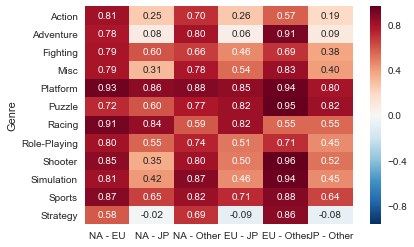

In [70]:
sns.heatmap(corr_by_genre, annot=True, fmt=".2f")

#### ジャンルごとの販売数の推移

ジャンルごとの全世界での販売数を時系列としてプロットします。

In [71]:
genre_year = (game_data.pivot_table('Global_Sales', ['Genre', 'Year'], aggfunc='sum')
              .reset_index())
genre_year.head(20)

Genre  Year  Global_Sales
0      Action  2001         59.39
1      Action  2002         86.75
2      Action  2003         67.93
3      Action  2004         76.26
4      Action  2005         85.66
5      Action  2006         66.58
6      Action  2007        106.50
7      Action  2008        136.39
8      Action  2009        139.36
9      Action  2010        117.64
10     Action  2011        118.87
11     Action  2012        122.01
12     Action  2013        125.22
13     Action  2014         99.02
14     Action  2015         70.70
15  Adventure  2001          9.12
16  Adventure  2002         11.05
17  Adventure  2003          2.14
18  Adventure  2004          8.51
19  Adventure  2005          8.53

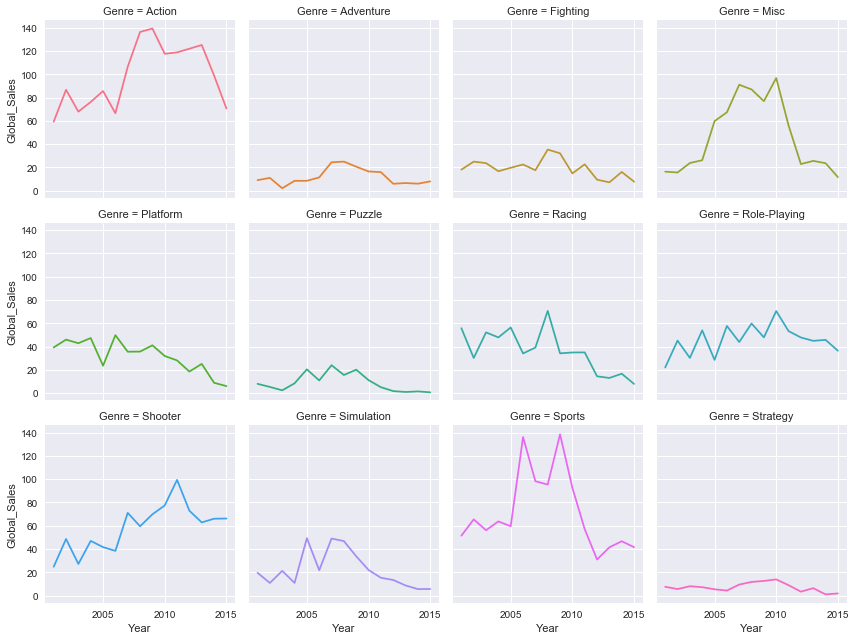

In [72]:
g = sns.FacetGrid(genre_year, col='Genre', hue='Genre', col_wrap=4)
g.map(plt.plot, 'Year', 'Global_Sales');